In [24]:
import json
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import pandas as pd

import importlib

from dredFISH.Analysis.__init__plots import *
from dredFISH.Analysis import basicu 

from dredFISH.Design.model_v1p3_gene_celltype_tuneinit import CellTypeNet
from dredFISH.Design import data_loader_scrna 
importlib.reload(data_loader_scrna)

<module 'dredFISH.Design.data_loader_scrna' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Design/data_loader_scrna.py'>

In [2]:
rootdat_dir = '/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/' 
!ls $rootdat_dir

nbit = 12
nrcn = 1
lr = 0.1
dat_dir = rootdat_dir + f'11-smrt-zdim_lmd01.00e+00_nbit{nbit}_nrcn{nrcn}_lr{lr}'

print(dat_dir)
print(os.path.isdir(dat_dir))

00_test_recon
01_test_recon
02-2_reduced_class_longiter
02_reduced_class
03-1_gpu
03-2_cpu
04-1_gpu
04-2_cpu
05-1_drprt0.0
05-1_drprt0.1
05-1_drprt0.2
05-1_drprt0.3
05-1_drprt0.4
05-1_drprt0.5
05-1_drprt0.6
05-1_drprt0.7
05-1_drprt0.8
05-1_drprt0.9
06-gene140
06-gene140_lmd01.00e-01
06-gene140_lmd01.00e+01
06-gene140_lmd01.00e-03
06-gene140_lmd01.00e+03
06-gene140_lmd01.00e-05
06-gene140_lmd01.00e+05
06-v3-simple-gene140_1.00e+00
06-v3-simple-gene140_1.00e-05
06-v3-simple-gene140_1.00e+05
06-v4-gene140_lmd01.00e+00
06-v4-gene140_lmd01.00e-05
06-v4-gene140_lmd01.00e+05
06-v5-gene140_lmd01.00e+05
06-v6-simple-gene140_lmd01.00e+05_nbit100
06-v6-simple-gene140_lmd01.00e+05_nbit50
06-v6-simple-gene140_lmd01.00e+05_nbit70
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr0.001
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr0.01
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr0.1
06-v7-simple-gene140_lmd01.00e+05_nbit70_nrcn1_lr1
06-v7-simple-g

# outputs
- embmat - a (ncell, nbit (24)) matrix
- model - a pytorch format
- results -- some summary statistics

- meta (what are these parameters?)
    - max-half_nrml-90000.0-1.27E+05-24-0-2.60E-09-0.01-1.0
    - max-half_nrml-90000.0-1.32E+05-24-0-3.40E-09-0.01-1.0

In [3]:
!ls $dat_dir

'embmat=xxx-xxx-90000.0-xxx-12-0-xxx-xxx-xxx.json'
'model=xxx-xxx-90000.0-xxx-12-0-xxx-xxx-xxx.pt'
'result=xxx-xxx-90000.0-xxx-12-0-xxx-xxx-xxx.json'


# the results (statistics)

In [4]:
f = glob.glob(os.path.join(dat_dir, 'result*'))[0]
print(f)

with open(f, 'r') as fh:
    res = json.load(fh)

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/11-smrt-zdim_lmd01.00e+00_nbit12_nrcn1_lr0.1/result=xxx-xxx-90000.0-xxx-12-0-xxx-xxx-xxx.json


In [5]:
lc_x = []
lc_ttl = []

lc_rcn_lss = []
lc_ctg_lss = []
lc_fine_acc = []

lc_rcn_lss_eval = []
lc_ctg_lss_eval = []
lc_fine_acc_eval = []

for _epoch in res.keys():
    _iters = list(res[_epoch].keys())
    steps = np.arange(len(_iters))/len(_iters)
    lc_x = np.hstack([lc_x, (int(_epoch) + steps)])
    
    lc_ttl = np.hstack([lc_ttl, [res[_epoch][_iter]['ttl'] for _iter in _iters]])
    
    lc_rcn_lss = np.hstack([lc_rcn_lss, [res[_epoch][_iter]['rcn_lss'] for _iter in _iters]])
    lc_ctg_lss = np.hstack([lc_ctg_lss, [res[_epoch][_iter]['ctg_lss'] for _iter in _iters]])
    lc_fine_acc = np.hstack([lc_fine_acc, [res[_epoch][_iter]['fine_acc'] for _iter in _iters]])
    
    lc_rcn_lss_eval = np.hstack([lc_rcn_lss_eval, [res[_epoch][_iter]['rcn_lss_eval'] for _iter in _iters]])
    lc_ctg_lss_eval = np.hstack([lc_ctg_lss_eval, [res[_epoch][_iter]['ctg_lss_eval'] for _iter in _iters]])
    lc_fine_acc_eval = np.hstack([lc_fine_acc_eval, [res[_epoch][_iter]['fine_acc_eval'] for _iter in _iters]])
    

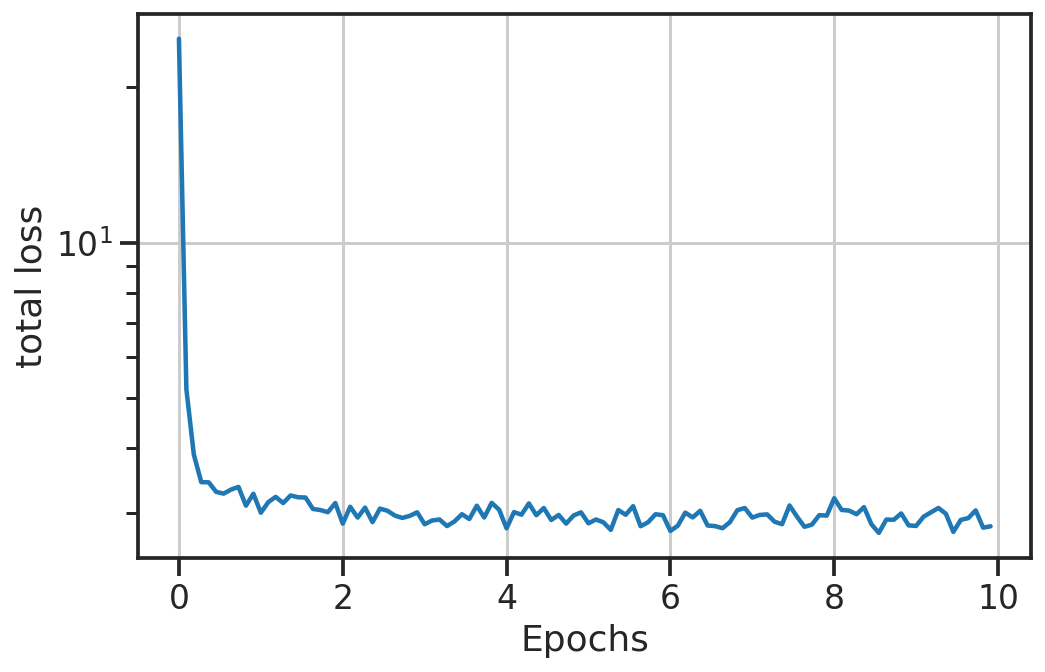

In [6]:
fig, ax = plt.subplots(1,1,figsize=(1*8,1*5))
ax.plot(lc_x, lc_ttl, '-', label='train')
ax.set_xlabel('Epochs')
ax.set_ylabel('total loss')
ax.set_yscale('log')
plt.show()


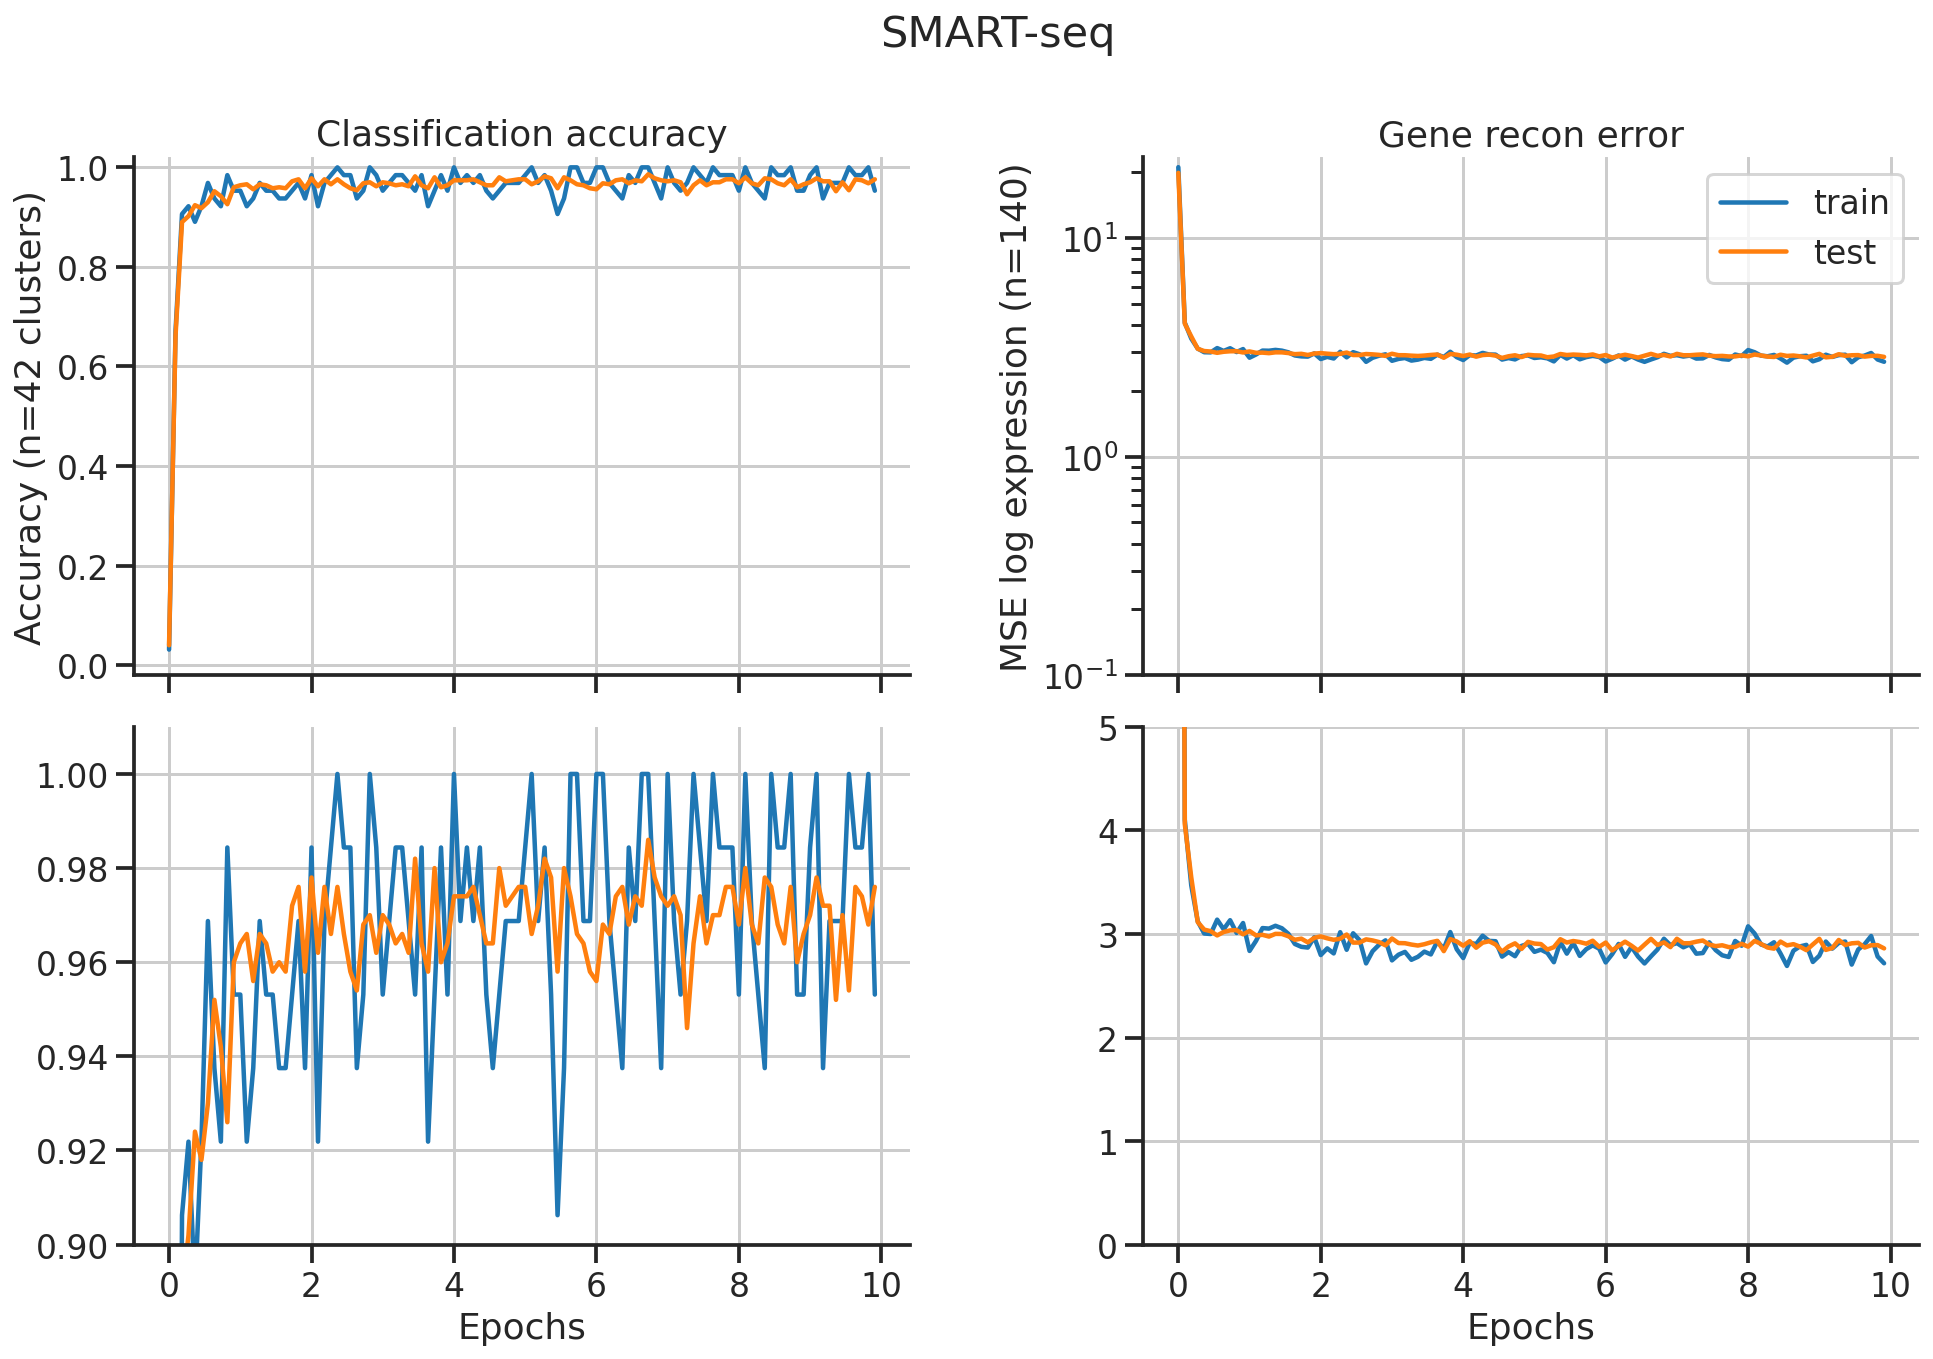

In [7]:
fig, axs = plt.subplots(2,2,figsize=(2*8,2*5), sharex=True)
axs = axs.flatten()

ax = axs[0] 
ax.plot(lc_x, lc_fine_acc, '-', label='train')
ax.plot(lc_x, lc_fine_acc_eval, '-', label='test')

# ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy (n=42 clusters)')
ax.set_title('Classification accuracy')
ax.set_ylim([-0.02,1.02])
sns.despine(ax=ax)
# ax.legend()

ax = axs[2] 
ax.plot(lc_x, lc_fine_acc, '-', label='train')
ax.plot(lc_x, lc_fine_acc_eval, '-', label='test')

ax.set_xlabel('Epochs')
# ax.set_ylabel('Accuracy (n=42 clusters)')
# ax.set_title('Classification accuracy')
ax.set_ylim([0.9,1.01])
sns.despine(ax=ax)
# ax.legend()

ax = axs[1]
ax.plot(lc_x, lc_rcn_lss, '-', label='train')
ax.plot(lc_x, lc_rcn_lss_eval, '-', label='test')
# ax.set_xlabel('Epochs')
ax.set_ylabel('MSE log expression (n=140)')
ax.set_title('Gene recon error')
ax.set_yscale('log')
ax.set_ylim(ymin=1e-1)
sns.despine(ax=ax)
ax.legend()

ax = axs[3]
ax.plot(lc_x, lc_rcn_lss, '-', label='train')
ax.plot(lc_x, lc_rcn_lss_eval, '-', label='test')
ax.set_xlabel('Epochs')
# ax.set_ylabel('MSE log expression (n=140)')
# ax.set_title('gene  recon error')
# ax.set_yscale('log')
ax.set_ylim(ymax=5, ymin=0)
sns.despine(ax=ax)
# ax.legend()

fig.subplots_adjust(wspace=0.3, hspace=0.1)
fig.suptitle('SMART-seq')
plt.show()


## Calculate R2 per gene 
- on any data
- on validation data only

In [8]:
def get_mse_torch(tnsr_true, tnsr_pred=[]):
    """Mean (over rows) squared error
    if no pred, returns the variance.
    """
    if len(tnsr_pred):
        mse = (tnsr_true - tnsr_pred).square().mean(axis=0)
    else:
        mse = (tnsr_true - tnsr_true.mean(axis=0)).square().mean(axis=0)
    return mse
        
def get_r2_torch(tnsr_true, tnsr_pred, zero_tol=1e-10):
    """
    """
    mse = get_mse_torch(tnsr_true, tnsr_pred)
    var = get_mse_torch(tnsr_true)
    r2 = 1-mse/torch.clamp(var, min=zero_tol)
    return r2

# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

In [9]:
# prep the model
f = glob.glob(os.path.join(dat_dir, 'model*'))[0]
print(f)

reduction, cnst, mxpr, min_pos, n_bit, drprt, lmd1, lmd2, lmd3 = (os.path.basename(f)
                                                                        [len('model='):-len('.pt')]
                                                                        .replace('E-', 'expn').split('-')
                                                                 )
lmd0 = 1
mxpr = np.float64(mxpr)
# min_pos = np.float64(min_pos)
n_bit = int(n_bit)
drprt = np.float64(drprt)
# lmd1 = np.float64(lmd1.replace('expn', 'E-'))
# lmd2 = np.float64(lmd2)
# lmd3 = np.float64(lmd3)
reduction, cnst, mxpr, min_pos, n_bit, drprt, lmd1, lmd2, lmd3

/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/11-smrt-zdim_lmd01.00e+00_nbit12_nrcn1_lr0.1/model=xxx-xxx-90000.0-xxx-12-0-xxx-xxx-xxx.pt


('xxx', 'xxx', 90000.0, 'xxx', 12, 0.0, 'xxx', 'xxx', 'xxx')

In [10]:
# test
trn_dataloader = data_loader_scrna.load_Allen_data(
    datasetkey='smrt_trn', 
    keyX='counts', keyY='l3_code', keyYcat='l3_cat', 
    batch_size=64,
)
tst_dataloader = data_loader_scrna.load_Allen_data(
    datasetkey='smrt_tst', 
    keyX='counts', keyY='l3_code', keyYcat='l3_cat', 
    batch_size=500,
)
gsubidx = torch.load(
    os.path.join('/bigstore/GeneralStorage/fangming/projects/dredfish/data/', 'rna', 'gidx_sub140_smrt_v1.pt')
)

n_gns = trn_dataloader.dataset.X.shape[1] # number of genes
n_cat = len(trn_dataloader.dataset.Ycat) # number of clusters
cnstrnts = torch.tensor(trn_dataloader.dataset.data['num_probe_limit'])
n_rcn_layers = nrcn

model= CellTypeNet(n_gns=     n_gns,                      
                   n_cat=     n_cat,                      
                   gsubidx= gsubidx,
                   n_rcn_layers=n_rcn_layers,
                   n_bit=     n_bit,                      # fixed
                   mxpr=      mxpr,
                   drprt=     0,
                   lmd0=      lmd0,
                  )
model.load_state_dict(torch.load(f, map_location=device))
# model.eval()

<All keys matched successfully>

In [11]:
model.eval()

# evaluate
i = 0
with torch.no_grad():
    # validation dataset
    smrt_ftrs, smrt_clsts = next(iter(tst_dataloader))
    smrt_ftrs= smrt_ftrs.float().to(device)
    smrt_ftrs_gsub= (smrt_ftrs[:,gsubidx]+1).log() # log(x+1) norm

    smrt_fine, smrt_ftrs_rcn, smrt_emb, = model.forward(smrt_ftrs, rnd=True)
    # smrt_rcn_lss = (smrt_ftrs_rcn - smrt_ftrs_gsub).square().mean()
    smrt_rcn_lss = nn.MSELoss()(smrt_ftrs_rcn, smrt_ftrs_gsub)

    smrt_r2 = get_r2_torch(smrt_ftrs_gsub, smrt_ftrs_rcn)

In [12]:
smrt_rcn_lss

tensor(2.8637)

In [26]:
out_sum = os.path.join(dat_dir, "gene_recon_r2.csv")
print(out_sum)
pd.DataFrame(smrt_r2).to_csv(out_sum)


/bigstore/GeneralStorage/fangming/projects/dredfish/res_nn/11-smrt-zdim_lmd01.00e+00_nbit12_nrcn1_lr0.1/gene_recon_r2.csv


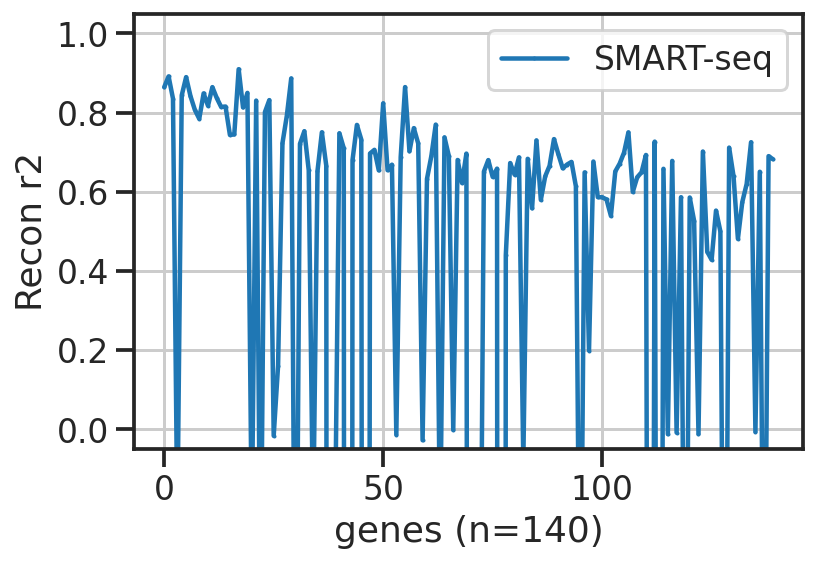

In [13]:
fig, ax = plt.subplots()
# ax.plot(tenx_r2, label='10X')
ax.plot(smrt_r2, '-o', label='SMART-seq', markersize=1)
ax.set_ylim([-0.05,1.05])
ax.set_ylabel('Recon r2')
ax.set_xlabel(f'genes (n={len(smrt_r2)})')
ax.legend(bbox_to_anchor=(1,1))
plt.show()

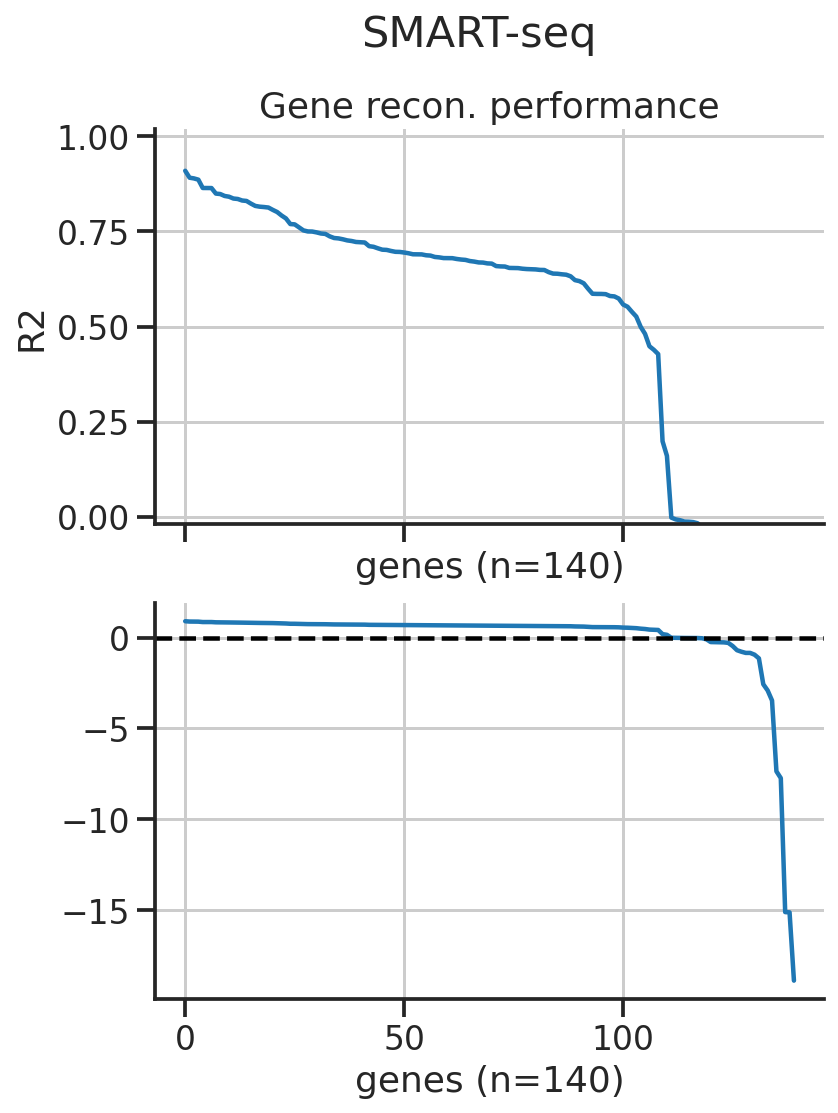

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(6*1,4*2), sharex=True)
ax = axs[0]
ax.plot(np.sort(smrt_r2)[::-1], '-', )
ax.set_ylim([-0.02,1.02])
ax.set_ylabel('R2')
ax.set_xlabel(f'genes (n={len(smrt_r2)})')
ax.set_title('Gene recon. performance')
# ax.legend()
sns.despine(ax=ax)

ax = axs[1]
ax.plot(np.sort(smrt_r2)[::-1], '-', )
ax.axhline(0, linestyle='--', color='k')
ax.set_xlabel(f'genes (n={len(smrt_r2)})')
# ax.legend()
sns.despine(ax=ax)

fig.suptitle('SMART-seq')
plt.show()

In [15]:
# dir(model.rcn)
model.rcn[0].weight.shape, model.rcn[0].bias.shape

(torch.Size([140, 12]), torch.Size([140]))

In [16]:
# model.dcd.weight.data
model.rcn

Sequential(
  (0): Linear(in_features=12, out_features=140, bias=True)
  (1): ReLU()
)

In [17]:
# torch.nn.init.kaiming_normal()
# torch.nn.init.kaiming_normal_()

In [18]:
n = 50 
val = nn.CrossEntropyLoss()(torch.tensor([1/n]*n).float(),
                      torch.tensor(0).long()
                     )
np.log(np.e), np.log(n), val.item()

(1.0, 3.912023005428146, 3.9120230674743652)

In [19]:
a = smrt_ftrs_gsub.mean(axis=0)
b = smrt_ftrs_rcn.mean(axis=0)

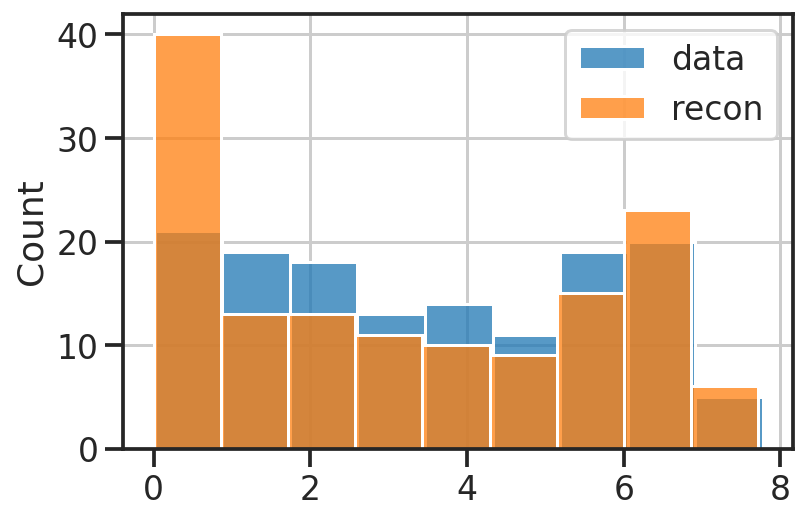

In [20]:
fig, ax = plt.subplots()
sns.histplot(a, label='data', color='C0', ax=ax)
sns.histplot(b, label='recon', color='C1', ax=ax)
ax.legend()
plt.show()

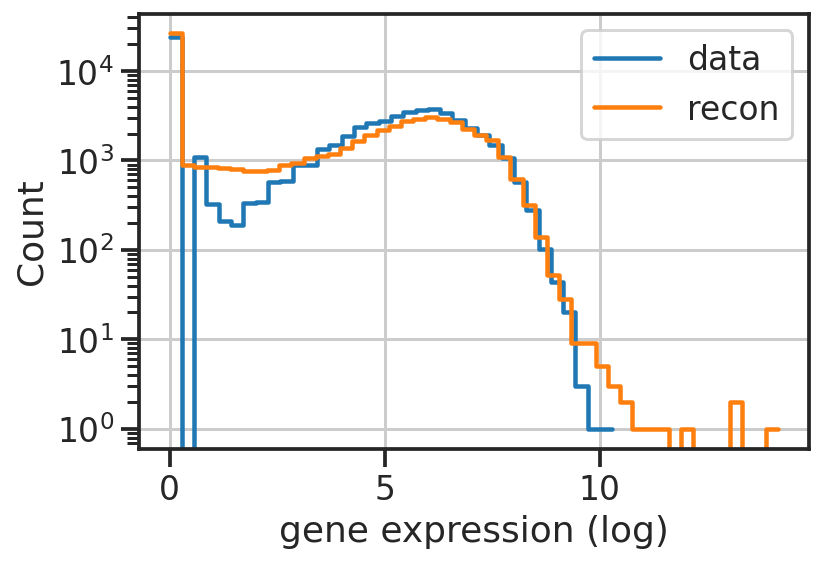

In [21]:
fig, ax = plt.subplots()
sns.histplot(smrt_ftrs_gsub.flatten(), label='data', element='step', fill=False, color='C0', ax=ax)
sns.histplot(smrt_ftrs_rcn.flatten(), label='recon', element='step', fill=False, color='C1', ax=ax)
ax.legend()
ax.set_yscale('log')
ax.set_xlabel('gene expression (log)')
plt.show()

In [22]:
smrt_ftrs_rcn.max(), smrt_ftrs_gsub.max()

(tensor(14.1523), tensor(10.2945))